In [13]:
# Cell 1: Import libraries
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [14]:
df=pd.read_csv(r"C:\Users\adity\Downloads\boston_housing.csv")
print("Shape:", df.shape)
print(df.head())

Shape: (506, 14)
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


In [15]:
# 3. Data Exploration
print(df.info())
print(df.describe())

# Check for missing values
print("Missing values:\n", df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB
None
             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634 

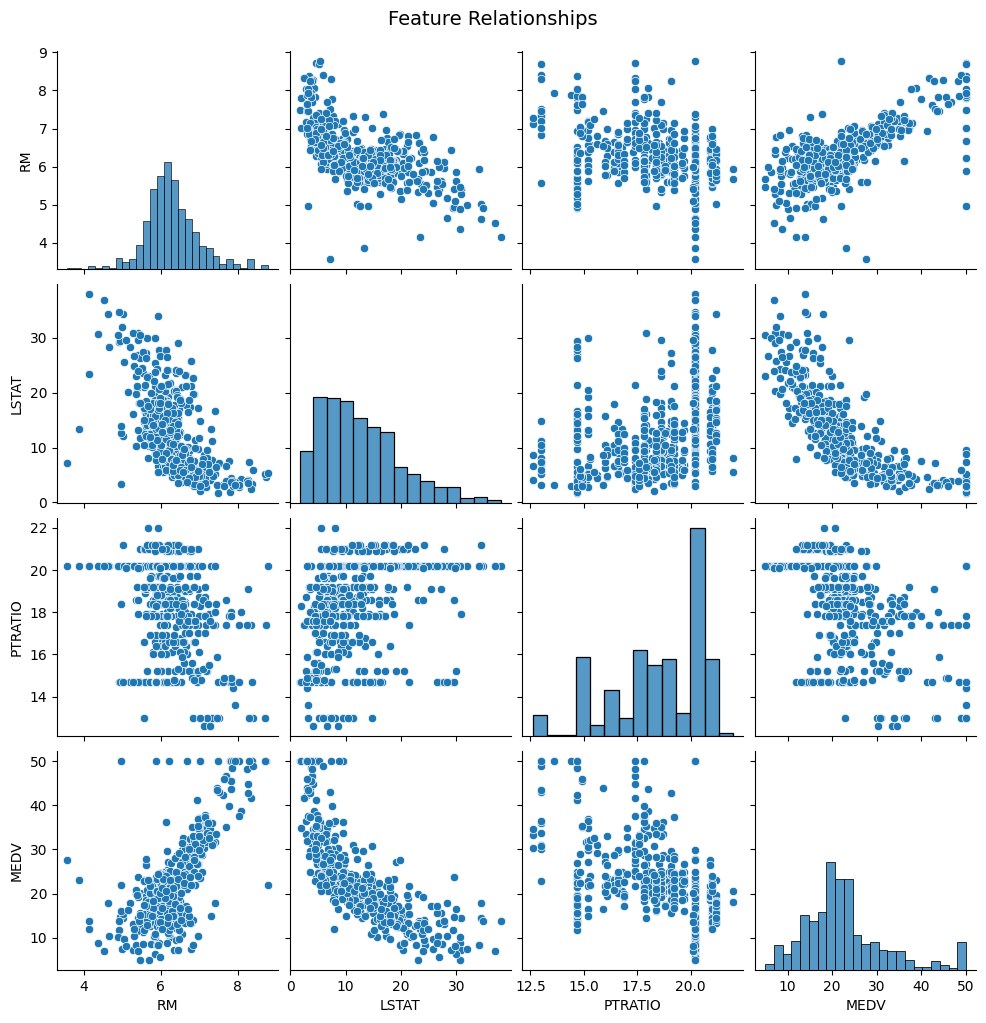

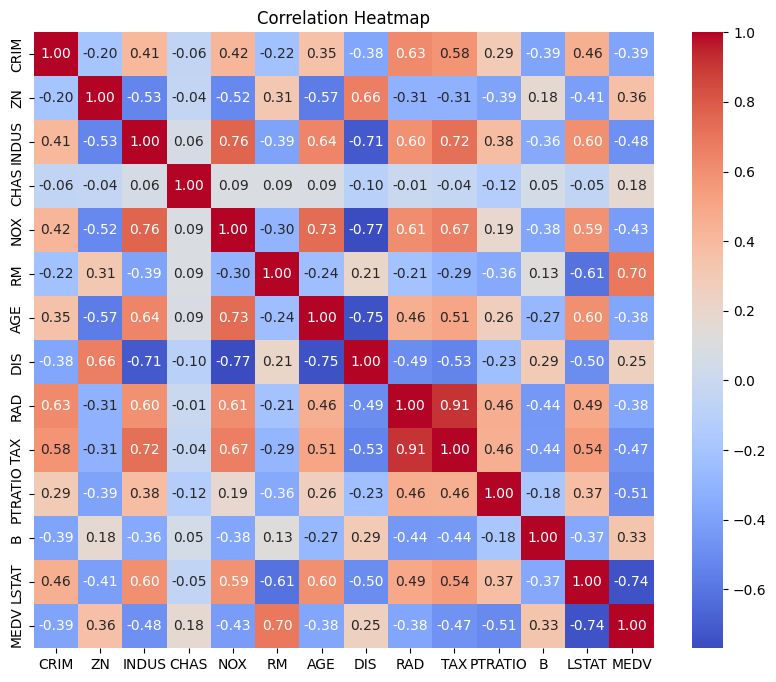

In [16]:
# 4. Visualizing Relationships

# Pairplot for selected features
sample_features = ['RM', 'LSTAT', 'PTRATIO', 'MEDV']
sns.pairplot(df[sample_features])
plt.suptitle("Feature Relationships", y=1.02, fontsize=14)
plt.show()

# Correlation Heatmap
plt.figure(figsize=(10,8))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


In [17]:
# 5. Feature Selection (optional, here we use all but the label)
X = df.drop("MEDV", axis=1)
y = df["MEDV"]


In [18]:
# 6. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print("Train Size:", X_train.shape)
print("Test Size:", X_test.shape)


Train Size: (404, 13)
Test Size: (102, 13)


In [19]:
# 7. Linear Regression Model Training
model = LinearRegression()
model.fit(X_train, y_train)

# Model coefficients
coefficients = pd.Series(model.coef_, index=X.columns)
print("Coefficients:")
print(coefficients)


Coefficients:
CRIM       -0.113056
ZN          0.030110
INDUS       0.040381
CHAS        2.784438
NOX       -17.202633
RM          4.438835
AGE        -0.006296
DIS        -1.447865
RAD         0.262430
TAX        -0.010647
PTRATIO    -0.915456
B           0.012351
LSTAT      -0.508571
dtype: float64


In [20]:
# 8. Predicting and Evaluating
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"R2 Score: {r2:.3f}")
print(f"RMSE: {rmse:.3f}")


R2 Score: 0.669
RMSE: 4.929


C:\Users\adity\AppData\Local\Temp\ipykernel_15696\3637156383.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2, color='red')


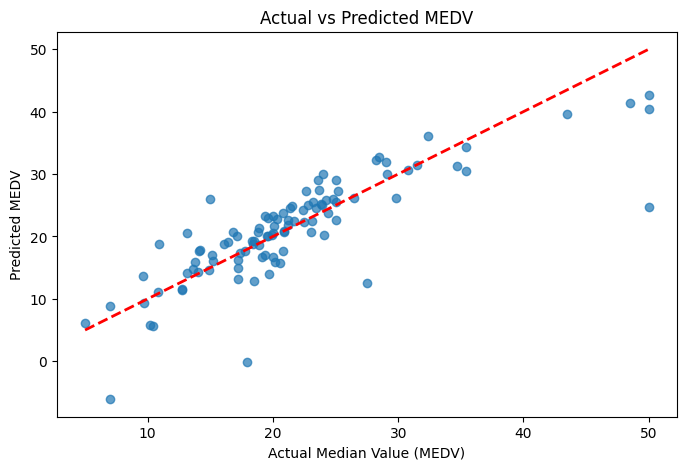

In [21]:
# 9. Visualization: Actual vs Predicted
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2, color='red')
plt.xlabel("Actual Median Value (MEDV)")
plt.ylabel("Predicted MEDV")
plt.title("Actual vs Predicted MEDV")
plt.show()


In [22]:
# 10. Prediction Example on New Data Row (optional)
# Take the first instance from the test set
sample = X_test.iloc[0].values.reshape(1, -1)
predicted_value = model.predict(sample)
print("Sample features:\n", X_test.iloc[0])
print(f"Predicted MEDV: {predicted_value[0]:.2f}")
print(f"Actual MEDV: {y_test.iloc[0]:.2f}")


Sample features:
 CRIM         0.09178
ZN           0.00000
INDUS        4.05000
CHAS         0.00000
NOX          0.51000
RM           6.41600
AGE         84.10000
DIS          2.64630
RAD          5.00000
TAX        296.00000
PTRATIO     16.60000
B          395.50000
LSTAT        9.04000
Name: 173, dtype: float64
Predicted MEDV: 29.00
Actual MEDV: 23.60


c:\Users\adity\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [23]:
X = df.drop("MEDV", axis=1)
y = df["MEDV"]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("✅ Train-Test Split Done")
print("Train set:", X_train.shape, y_train.shape)
print("Test set:", X_test.shape, y_test.shape)

✅ Train-Test Split Done
Train set: (404, 13) (404,)
Test set: (102, 13) (102,)


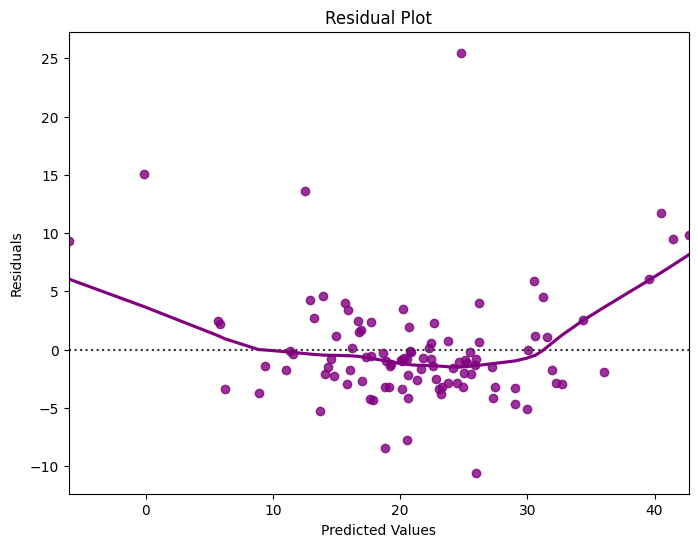

In [24]:
# 10. Residual Plot
plt.figure(figsize=(8,6))
sns.residplot(x=y_pred, y=y_test - y_pred, lowess=True, color="purple")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()


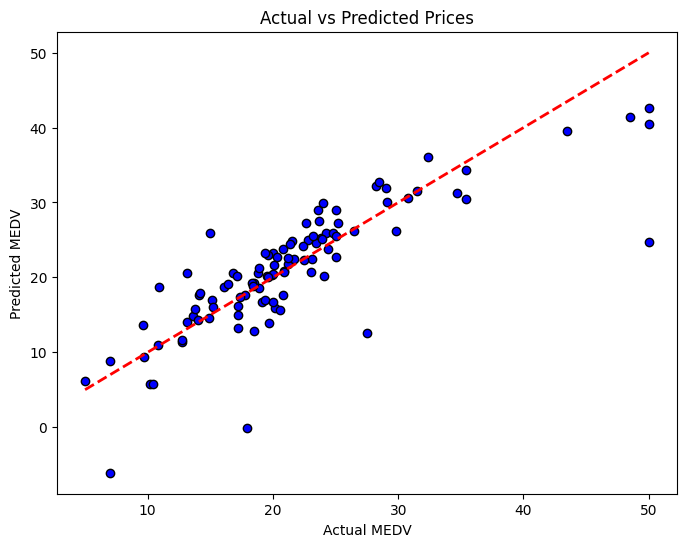

In [25]:
# 9. Actual vs Predicted plot
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color="blue", edgecolor="k")
plt.plot([y.min(), y.max()], [y.min(), y.max()], "r--", lw=2)  # ideal line
plt.xlabel("Actual MEDV")
plt.ylabel("Predicted MEDV")
plt.title("Actual vs Predicted Prices")
plt.show()
